In [ ]:
!pip uninstall -y scikit-learn

In [ ]:
!pip install -U scikit-learn==1.3.1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11008 entries, 0 to 11007
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   h       11008 non-null  int64  
 1   C       11008 non-null  float64
 2   FM      11008 non-null  float64
 3   Xfm     11008 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 344.1 KB
Accuracy: 95.14%
Confusion Matrix:
[[ 542   43]
 [  64 1553]]
Precision (Class 0): 0.89
Precision (Class 1): 0.97
Recall (Class 0): 0.93
Recall (Class 1): 0.96
F1-score (Class 0): 0.91
F1-score (Class 1): 0.97
ROC-AUC: 0.99


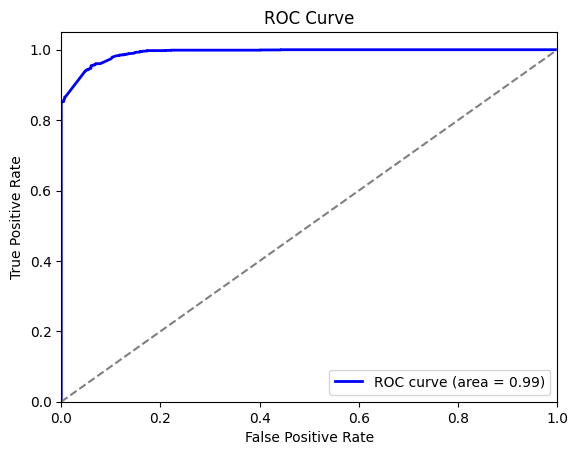

Cross-validated Accuracy: 95.47%
Cross-validated Precision: 0.96
Cross-validated Recall: 0.98
Cross-validated F1-score: 0.97
Cross-validated ROC-AUC: 0.99


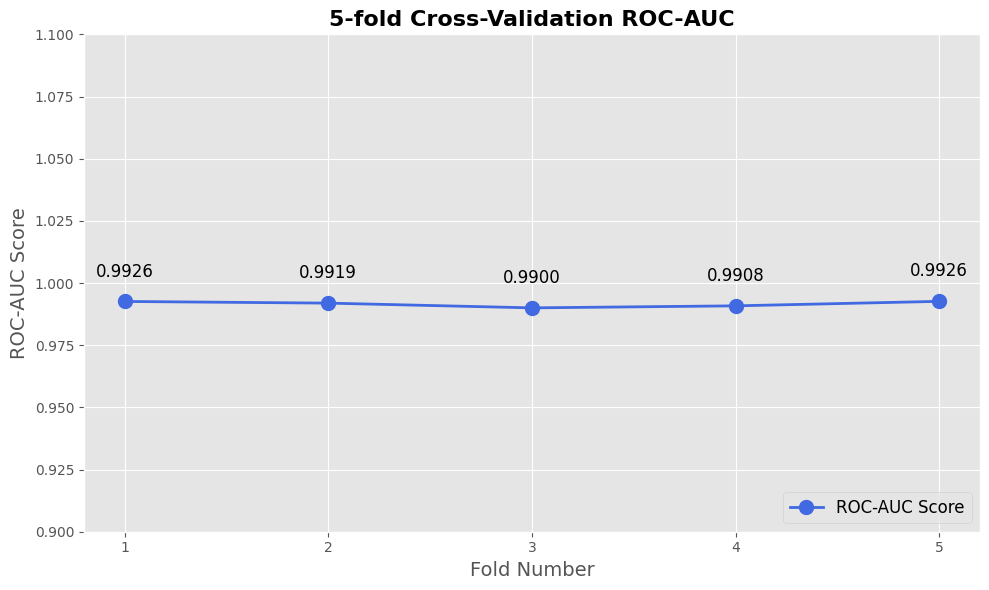

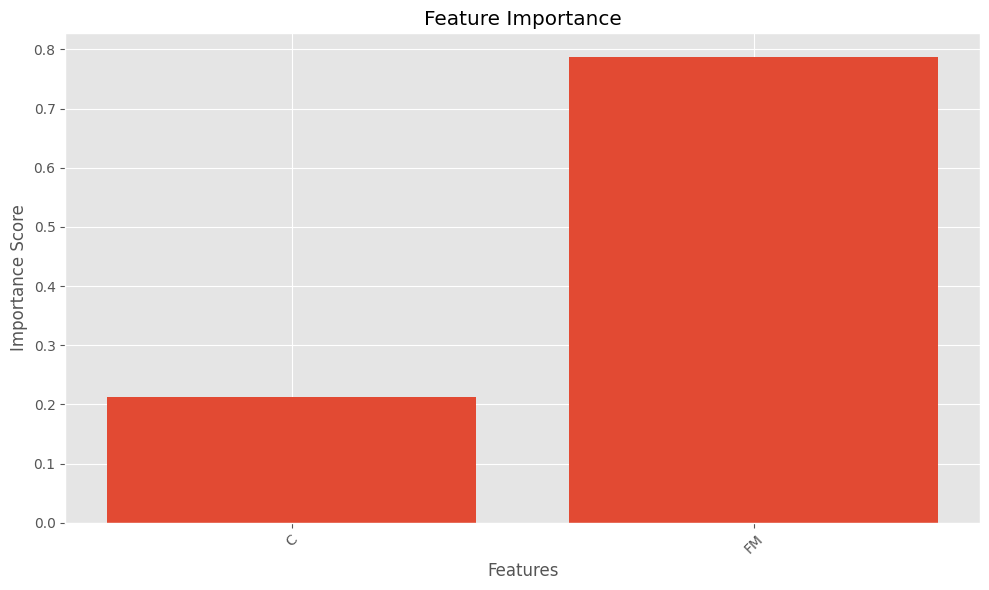

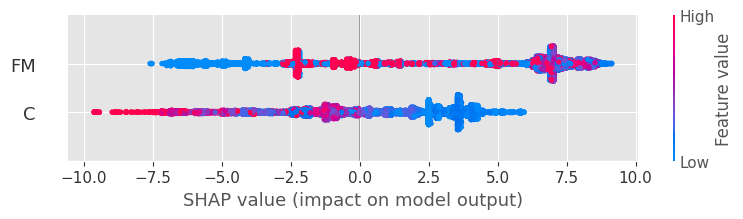

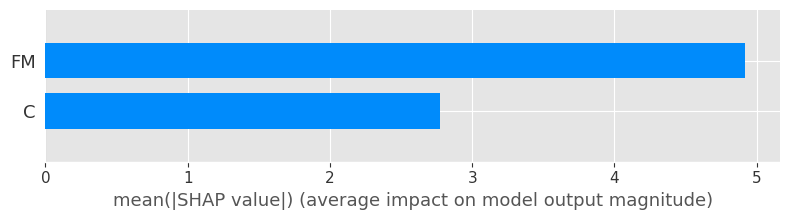

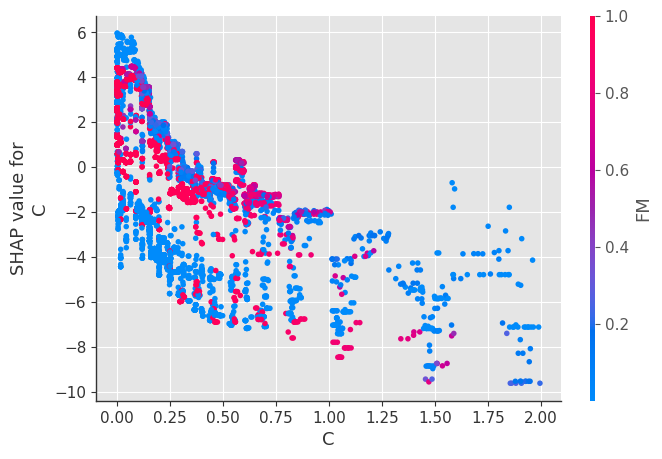

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


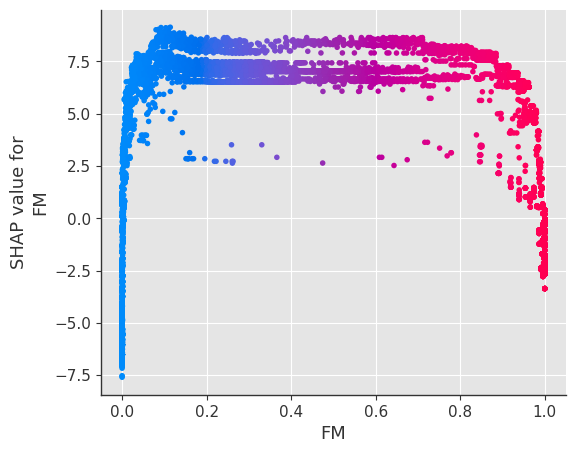

Средняя точность модели с Gini: 0.9573


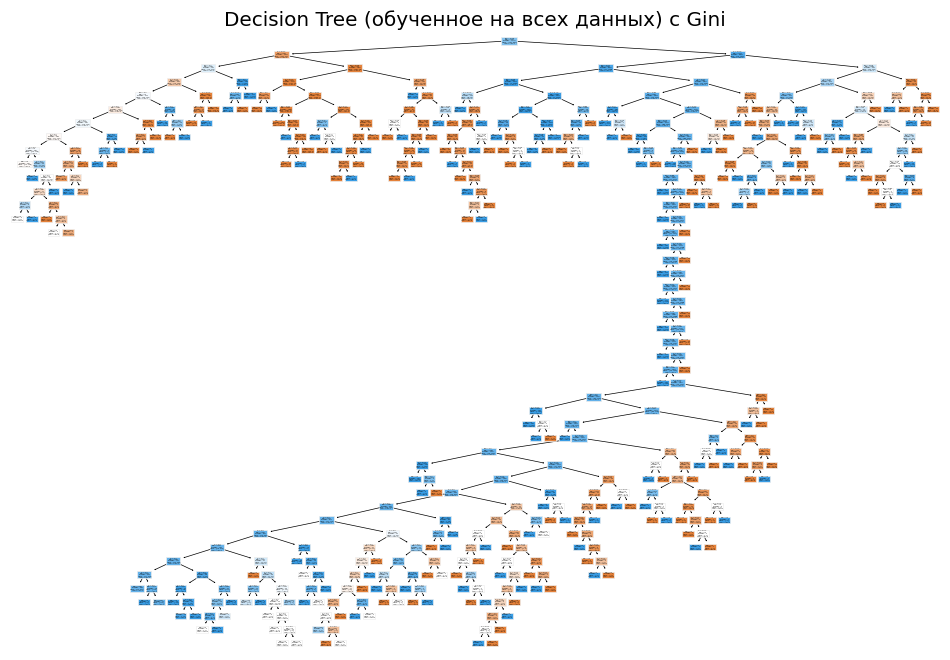

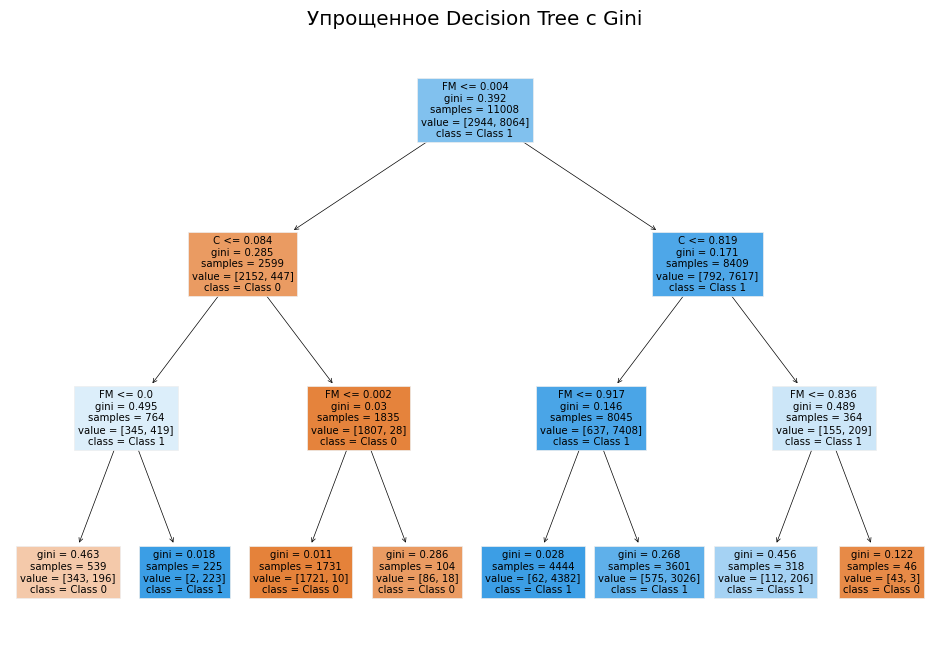

Средняя точность модели с Entropy: 0.9586


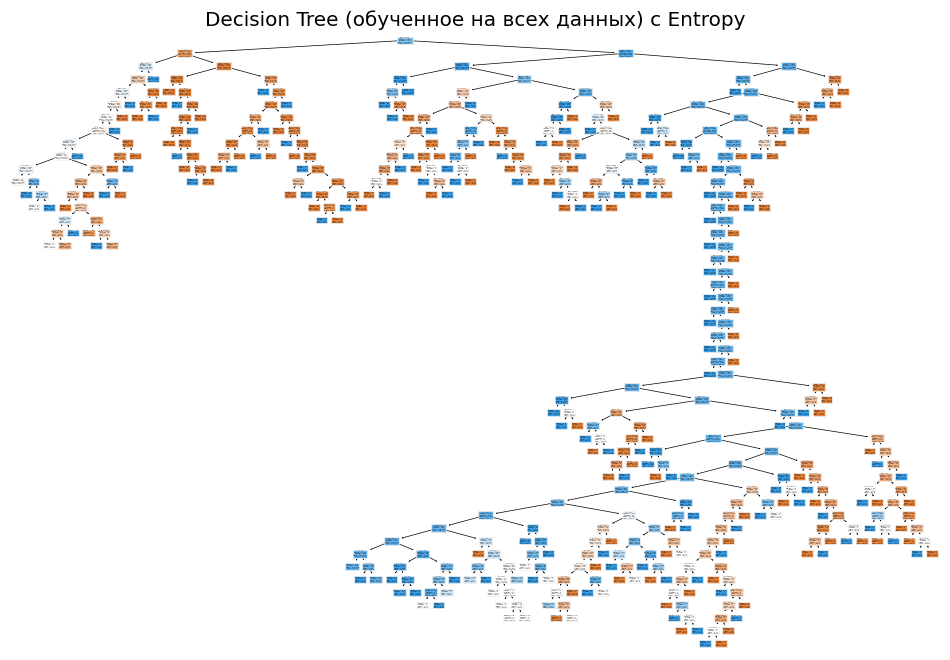

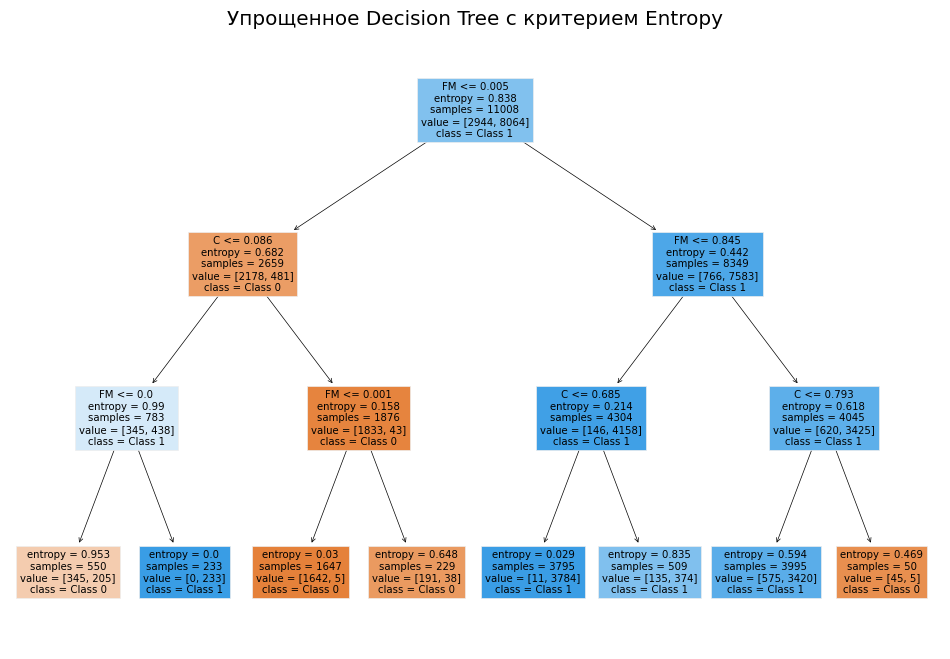

Распределение классов в обучающей выборке:
h
1    6447
0    2359
Name: count, dtype: int64

Распределение классов в тестовой выборке:
h
1    1617
0     585
Name: count, dtype: int64


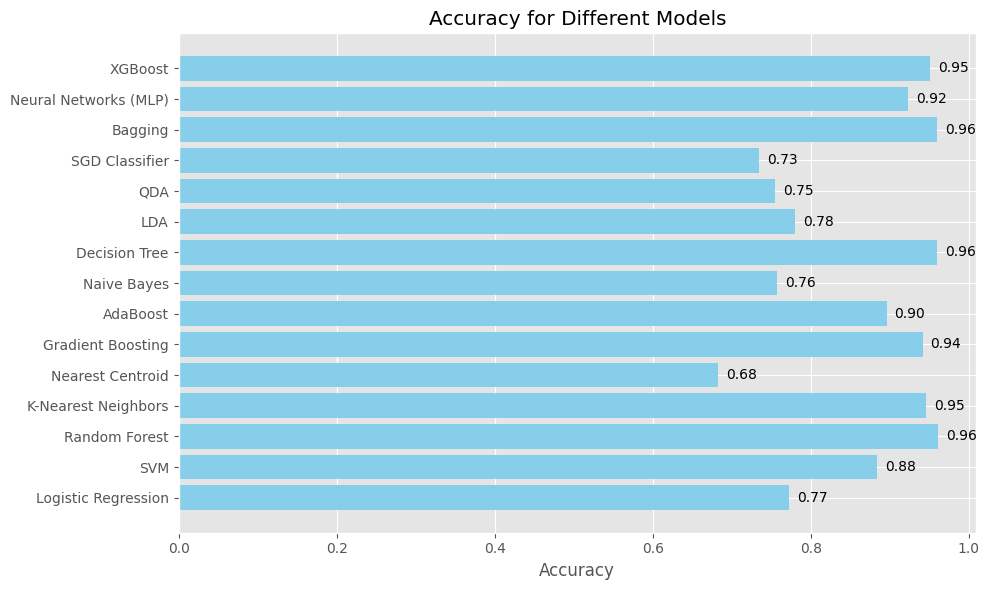

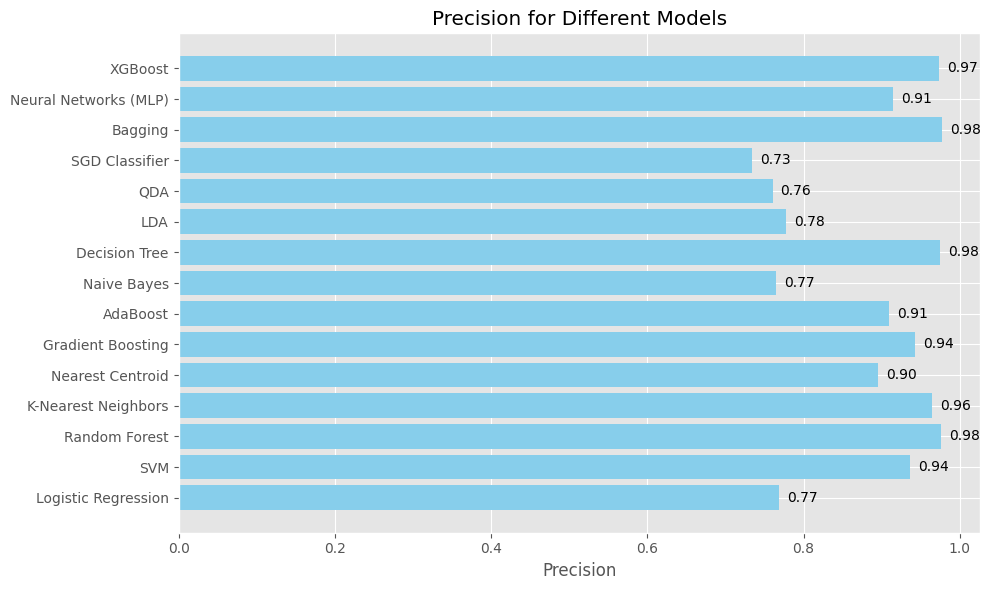

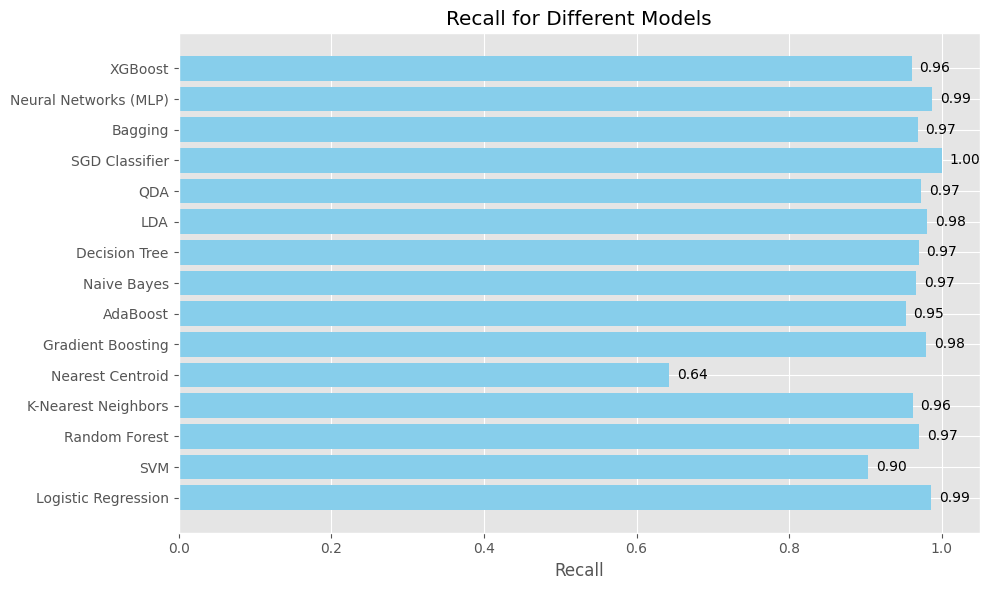

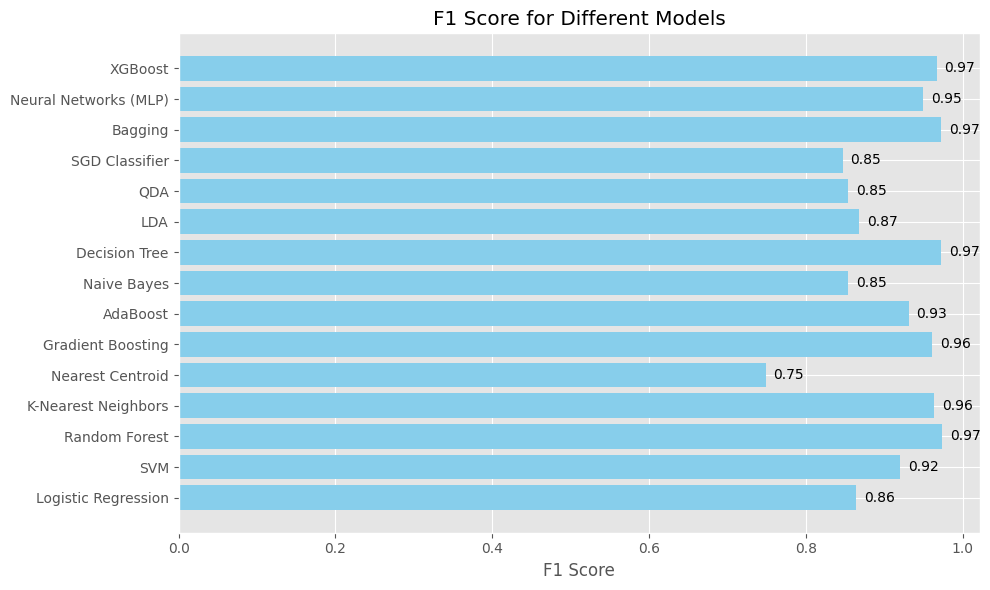

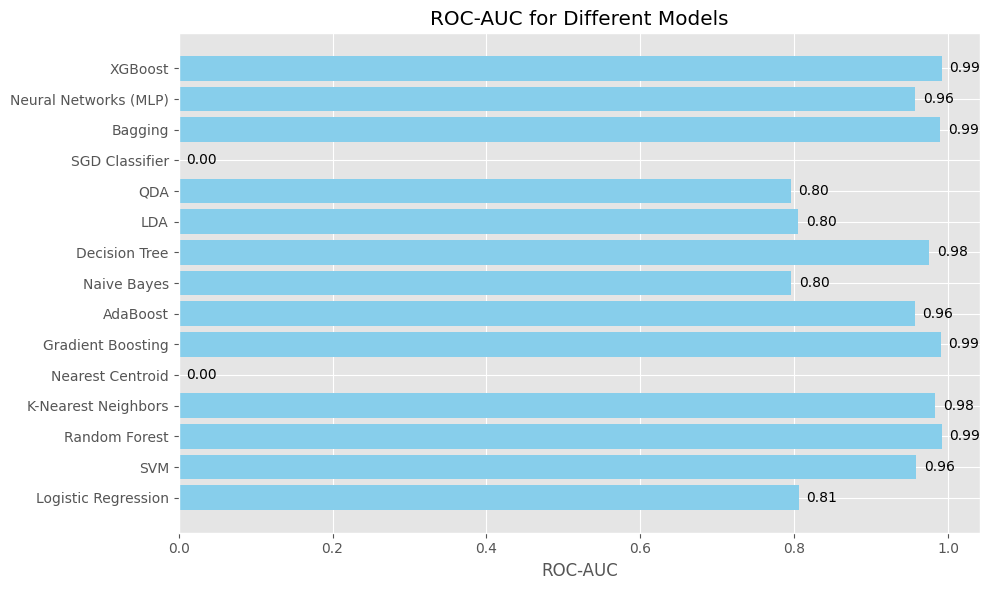

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Импортируем необходимые библиотеки
import pandas as pd  # Для работы с данными
from xgboost import XGBClassifier  # Для работы с алгоритмом XGBoost
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, StratifiedKFold  # Для разделения данных и кросс-валидации
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve)  # Метрики для оценки модели
import matplotlib.pyplot as plt  # Для построения графиков
import numpy as np  # Для работы с массивами данных
import shap  # Для объяснения модели и анализа признаков
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

# Сокращаем количество признаков до C, FM, AFM:
train_test_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/AI_phase_diagram/Final_version/data/Main_Data_Model_0_1.csv', delimiter=',', encoding='utf-8')
train_test_df.drop(['L', 'T', 'E', 'AFM', 'Xafm'], axis=1, inplace=True)
train_test_df.info()

# Обучаем модель по C и FM
# Разбиваем данные на признаки X и таргеты y
X = pd.concat([train_test_df['C'], train_test_df['FM']], axis=1)
y = train_test_df['h']
# Разбиваем данные на train и test выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Создание и обучение модели XGBoost
model = XGBClassifier()  # Создаем классификатор XGBoost
model.fit(X_train, y_train)  # Обучаем модель на тренировочных данных

# Предсказания на тестовых данных
y_pred = model.predict(X_test)  # Делаем предсказания на тестовом наборе

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)  # Вычисляем точность предсказаний
print(f"Accuracy: {accuracy * 100:.2f}%")  # Выводим точность в процентах

# Вычисление матрицы ошибок
cm = confusion_matrix(y_test, y_pred)  # Матрица ошибок
print(f"Confusion Matrix:\n{cm}")  # Выводим матрицу ошибок

# Метрики Precision для обоих классов
precision_zero = precision_score(y_test, y_pred, pos_label=0)  # Precision для класса 0
precision_one = precision_score(y_test, y_pred, pos_label=1)  # Precision для класса 1
print(f"Precision (Class 0): {precision_zero:.2f}")  # Вывод Precision для класса 0
print(f"Precision (Class 1): {precision_one:.2f}")  # Вывод Precision для класса 1

# Метрики Recall для обоих классов
recall_zero = recall_score(y_test, y_pred, pos_label=0)  # Recall для класса 0
recall_one = recall_score(y_test, y_pred, pos_label=1)  # Recall для класса 1
print(f"Recall (Class 0): {recall_zero:.2f}")  # Вывод Recall для класса 0
print(f"Recall (Class 1): {recall_one:.2f}")  # Вывод Recall для класса 1

# Метрики F1-score для обоих классов
f1_zero = f1_score(y_test, y_pred, pos_label=0)  # F1-score для класса 0
f1_one = f1_score(y_test, y_pred, pos_label=1)  # F1-score для класса 1
print(f"F1-score (Class 0): {f1_zero:.2f}")  # Вывод F1-score для класса 0
print(f"F1-score (Class 1): {f1_one:.2f}")  # Вывод F1-score для класса 1

# Предсказания вероятностей для положительного класса и ROC-AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Предсказания вероятностей для положительного класса (1)
roc_auc = roc_auc_score(y_test, y_pred_prob)  # Вычисление ROC-AUC
print(f"ROC-AUC: {roc_auc:.2f}")  # Вывод ROC-AUC

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # Вычисление точек для ROC-кривой
plt.figure()  # Создаем новый график
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')  # Построение ROC-кривой
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Диагональ "случайного угадывания"
plt.xlim([0.0, 1.0])  # Устанавливаем границы оси X
plt.ylim([0.0, 1.05])  # Устанавливаем границы оси Y
plt.xlabel('False Positive Rate')  # Подпись оси X
plt.ylabel('True Positive Rate')  # Подпись оси Y
plt.title('ROC Curve')  # Заголовок графика
plt.legend(loc="lower right")  # Расположение легенды
plt.show()  # Показываем график

# 5-кратная кросс-валидация с разными метриками
kfold = StratifiedKFold(n_splits=5, shuffle=True)  # Создаем стратегию кросс-валидации с 5 разбиениями

# Кросс-валидация по точности
accuracy_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')  # Кросс-валидация по метрике точности
print(f"Cross-validated Accuracy: {accuracy_scores.mean() * 100:.2f}%")  # Вывод средней точности по кросс-валидации

# Кросс-валидация по Precision, Recall, F1 и ROC-AUC
precision_scores = cross_val_score(model, X, y, cv=kfold, scoring='precision')  # Precision
recall_scores = cross_val_score(model, X, y, cv=kfold, scoring='recall')  # Recall
f1_scores = cross_val_score(model, X, y, cv=kfold, scoring='f1')  # F1-score
roc_auc_scores = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')  # ROC-AUC

print(f"Cross-validated Precision: {precision_scores.mean():.2f}")  # Средний Precision по кросс-валидации
print(f"Cross-validated Recall: {recall_scores.mean():.2f}")  # Средний Recall по кросс-валидации
print(f"Cross-validated F1-score: {f1_scores.mean():.2f}")  # Средний F1-score по кросс-валидации
print(f"Cross-validated ROC-AUC: {roc_auc_scores.mean():.2f}")  # Средний ROC-AUC по кросс-валидации

# Визуализация кросс-валидационных ROC-AUC результатов
plt.style.use('ggplot')  # Стиль графика
plt.figure(figsize=(10, 6))  # Задаем размер графика
folds = np.arange(1, len(roc_auc_scores) + 1)  # Создаем массив с номерами фолдов
plt.plot(folds, roc_auc_scores, marker='o', markersize=10, linestyle='-', color='royalblue', linewidth=2, label='ROC-AUC Score')  # График ROC-AUC
for i, score in enumerate(roc_auc_scores):  # Добавляем текстовые метки с результатами для каждого фолда
    plt.text(folds[i], score + 0.01, f'{score:.4f}', ha='center', fontsize=12, color='black')
plt.ylim(0.9, 1.1)  # Устанавливаем границы по Y
plt.xticks(folds)  # Подписи на оси X
plt.xlabel('Fold Number', fontsize=14)  # Подпись оси X
plt.ylabel('ROC-AUC Score', fontsize=14)  # Подпись оси Y
plt.title('5-fold Cross-Validation ROC-AUC', fontsize=16, fontweight='bold')  # Заголовок графика
plt.grid(True)  # Включаем сетку
plt.legend(loc='lower right', fontsize=12)  # Легенда
plt.tight_layout()  # Автоматическое размещение элементов
plt.show()  # Показываем график

# Визуализация важности признаков
plt.figure(figsize=(10, 6))  # Задаем размер графика
plt.title('Feature Importance')  # Заголовок графика
plt.bar(range(len(model.feature_importances_)), model.feature_importances_, align='center')  # Столбчатая диаграмма важности признаков
plt.xticks(range(len(X.columns)), X.columns, rotation=45)  # Подписи осей X с названиями признаков
plt.xlabel('Features')  # Подпись оси X
plt.ylabel('Importance Score')  # Подпись оси Y
plt.tight_layout()  # Автоматическое размещение элементов
plt.show()  # Показываем график

# Создание Explainer для модели XGBoost и расчет SHAP значений
explainer = shap.TreeExplainer(model)  # Создаем объяснитель модели XGBoost
shap_values = explainer.shap_values(X_train)  # Вычисляем SHAP значения для обучающих данных

# Построение сводного графика SHAP
shap.summary_plot(shap_values, X_train)  # Построение стандартного сводного графика SHAP (точечный график), отображающего влияние каждого признака на предсказания
shap.summary_plot(shap_values, X_train, plot_type="bar")  # Построение сводного графика в виде столбчатой диаграммы, отображающей среднюю важность каждого признака

# Построение графиков зависимости SHAP для каждого признака
for name in X_train.columns:  # Цикл по каждому признаку
    shap.dependence_plot(name, shap_values, X_train, display_features=X_train)  # График зависимости для каждого признака

#СТРОИМ ДЕРЕВО
# Создание стратифицированных фолдов
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Кросс-валидация для модели с Gini
clf_gini = DecisionTreeClassifier(criterion='gini')
scores_gini = cross_val_score(clf_gini, X, y, cv=skf)
print(f"Средняя точность модели с Gini: {scores_gini.mean():.4f}")

# Обучение финальной модели на всех данных (Gini)
clf_gini.fit(X, y)

# Визуализация итогового (ПОЛНОГО) дерева решений с Gini
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.title('Decision Tree (обученное на всех данных) с Gini')
plt.show()

# Упрощенное дерево с глубиной 3 (Gini)
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf_gini.fit(X, y)

# Визуализация упрощенного дерева решений с Gini
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.title('Упрощенное Decision Tree с Gini')
plt.show()

# Кросс-валидация для модели с Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
scores_entropy = cross_val_score(clf_entropy, X, y, cv=skf)
print(f"Средняя точность модели с Entropy: {scores_entropy.mean():.4f}")

# Обучение финальной модели на всех данных (Entropy)
clf_entropy.fit(X, y)

# Визуализация итогового (ПОЛНОГО) дерева решений с Entropy
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.title('Decision Tree (обученное на всех данных) с Entropy')
plt.show()

# Упрощенное дерево с глубиной 3 (Entropy)
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf_entropy.fit(X, y)

# Визуализация упрощенного дерева решений с критерием Entropy
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.title('Упрощенное Decision Tree с критерием Entropy')
plt.show()

# Проверка распределения классов в тестовой и обучающей выборке
print("Распределение классов в обучающей выборке:")
print(y_train.value_counts())

print("\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts())

# Список моделей
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Nearest Centroid': NearestCentroid(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'SGD Classifier': SGDClassifier(),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier()),
    'Neural Networks (MLP)': MLPClassifier(max_iter=1000),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

# Списки для хранения метрик
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
model_names = []

# Обучение и расчет метрик для каждой модели
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Обучение модели
    y_pred = model.predict(X_test)  # Предсказание
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # Для ROC-AUC

    # Расчет метрик
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    # Добавляем метрики в списки
    model_names.append(model_name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(auc_roc if auc_roc is not None else 0)  # Если не было ROC-AUC, добавляем 0

# Визуализация метрик
metrics = {
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'ROC-AUC': roc_auc_list
}

# Построение графиков
for metric_name, metric_values in metrics.items():
    plt.figure(figsize=(10, 6))
    bars = plt.barh(model_names, metric_values, color='skyblue')
    plt.xlabel(metric_name)
    plt.title(f'{metric_name} for Different Models')
    plt.tight_layout()

    # Добавление значений метрик на график
    for bar, value in zip(bars, metric_values):
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center')

    plt.show()